# 국제 상품 가격 데이터
파이썬에서 국제 원자재(금, 은, 구리, 원유)의 가격을 가져와 다루는 방법

* 국제 금가격 (LBM, 런던금은시장)
* 국제 은 가격 (LBMA, 런던 금시장협회)
* 국제 구리 가격 (LME, 런던 금속 거래소)
* 국제 원유가격 (서부 텍사스 중질유, 두바이유, 북해 브렌트유)

<img src="http://i.imgur.com/qVjtvea.png" >

### 2017 http://fb.com/financedata

- 다음과 같이 plot()에서 figsize를 기본 크기를 지정할 수 도 있지만, 매번 그릴 때 마다 크기를 
  지정해야 하는 불편함이 있다. 특히, 시계열 차트를 많이 그리는 경우 시간에 따른 변화를 보기 위해 
  가로로 긴 차트를 그리는 경우가 더 많다.

   * plt.figure(figsize=(12, 3))
   * plt.plot(data)

- matplotlib.pylab의 rcParams 설정을 활용하면, 차트의 크기와 선의 색, 두께등의 기본 값을 설정할 수 있다.

   * %matplotlib inline
   * import matplotlib.pylab as plt

   * plt.rcParams["figure.figsize"] = (14,4)
   * plt.rcParams['lines.linewidth'] = 2
   * plt.rcParams['lines.color'] = 'r'
   * plt.rcParams['axes.grid'] = True 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['axes.grid'] = True 

In [5]:
!pip install pandas_datareader

In [6]:
import pandas as pd
import pandas_datareader as pdr

# 국제 금가격 (런던 금시장)
Gold Fixing Price in London Bullion Market (based in U.S. Dollar)
* (HSBC, 도이치은행 등) 5개 은행이 회의를 통해 Gold Fixing Price 발표
* 하루에 두 번 (10:30 AM, 3:00 PM 런던시간)

FRED (세인트루이스 연방준비은행 경제 데이터)
* https://fred.stlouisfed.org/series/GOLDAMGBD228NLBM
* https://fred.stlouisfed.org/series/GOLDPMGBD228NLBM 

In [7]:
df_gold = pdr.DataReader('GOLDAMGBD228NLBM', 'fred', start='2000-01-01')    # dataframe

print('row count:', len(df_gold))
df_gold.tail(10)

row count: 5077


GOLDAMGBD228NLBM
DATE                        
2019-06-05           1337.75
2019-06-06           1336.65
2019-06-07           1334.30
2019-06-10           1328.60
2019-06-11           1322.65
2019-06-12           1336.65
2019-06-13           1335.80
2019-06-14           1352.45
2019-06-17           1333.20
2019-06-18           1344.55

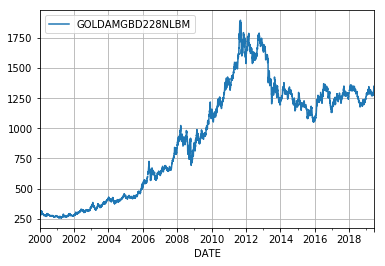

In [8]:
df_gold.plot()

In [9]:
# help(df_gold)

# 국제 은 가격
* https://www.quandl.com/ 다양한 금융, 경제 데이터와 API를 제공)
*  "LBMA/SILVER", 런던 금시장협회 (LBMA) 은 가격 

### To access QUANDL,
- (1)In order to retrieve data from quandl, you need to register for and input (via the parameter api_key or 
  the environment variable QUANDL_API_KEY) a Quandl API key. Registering for a key can be done here (https://docs.quandl.com/docs#section-authentication).
- (2) And also, you need to confirm the email message sent from quandl.

In [10]:
# 영국 은(silver)
df_silver = pdr.DataReader('LBMA/SILVER', 'quandl', access_key='NL_Uy8FexdtU3M6Zxb9a', start='2000-01-01')

print('row count:', len(df_silver))
df_silver.tail(10)

row count: 4917


USD      GBP     EURO
Date                                
2000-01-17  5.1250  3.13647  5.07175
2000-01-14  5.0950  3.09915  4.97802
2000-01-13  5.0900  3.09611  4.94895
2000-01-12  5.1450  3.12386  4.99386
2000-01-11  5.1550  3.13755  5.00729
2000-01-10  5.1450  3.14390  5.03178
2000-01-07  5.1350  3.12158  4.99028
2000-01-06  5.1400  3.11515  4.94231
2000-01-05  5.2850  3.22354  5.10135
2000-01-04  5.3025  3.23225  5.13808

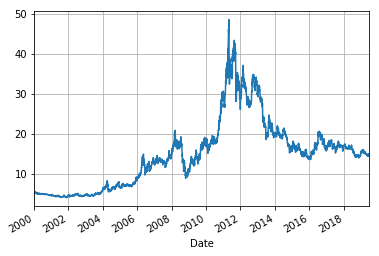

In [11]:
df_silver['USD'].plot()

# 국제 구리 가격
* 런던 금속 거래소(London Metal Exchange), 전 세계 비철금속거래의 지표
* Cash(현금가격), 3Months(3개월 선물가격), 15Months(15개월 선물가격) 등  

In [12]:
# LME 구리 가격
df_copper = pdr.DataReader('LME/PR_CU', 'quandl', access_key='NL_Uy8FexdtU3M6Zxb9a', start='2000-01-01' )

print('row count:', len(df_copper))
df_copper.tail(10)

RemoteDataError: Unable to read URL: https://www.quandl.com/api/v3/datasets/LME/PR_CU.csv?start_date=2000-01-01&end_date=2019-06-19&order=asc&api_key=NL_Uy8FexdtU3M6Zxb9a
Response Text:
b'code,message\nQECx02,You have submitted an incorrect Quandl code. Please check your Quandl codes and try again.\n'

In [13]:
df_copper['CashSeller&Settlement'].plot()

NameError: name 'df_copper' is not defined

# 국제 원유 가격
국제 원유 가격을 대표하는 3대 유종이 있으며, 생산지와 대표적인 소비지역이 다르다.

1. 서부 텍사스 중질유 (POILWTIUSDM): 국제 원유가격을 대표 
1. 두바이유 (POILDUBUSDM): 한국이 주로 수입(국내 유가에 영향)
1. 북해 브렌트유 (POILBREUSDM): 북해에서 생산, 유럽과 아프리카에서 소비

FRED 링크는 각각 다음과 같다.
* 서부 텍사스 중질유(WTI Crude):  https://fred.stlouisfed.org/series/POILWTIUSDM
* 두바이유 (Dubai Crude): https://fred.stlouisfed.org/series/POILDUBUSDM
* 북해 브렌트유(Brent Crude): https://fred.stlouisfed.org/series/POILBREUSDM

In [14]:
# 서부 텍사스 중질유(WTI Crude), monthly
df_wt = pdr.DataReader('POILWTIUSDM', 'fred', start='2000-01-01')

print('row count:', len(df_wt))
df_wt.tail(10)

row count: 210


POILWTIUSDM
DATE                   
2016-09-01    45.167273
2016-10-01    49.885238
2016-11-01    45.623182
2016-12-01    52.013636
2017-01-01    52.559545
2017-02-01    53.401500
2017-03-01    49.584783
2017-04-01    51.168000
2017-05-01    48.559565
2017-06-01    45.167727

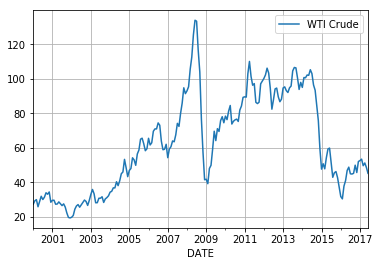

In [15]:
df_wt.columns = ['WTI Crude']
df_wt.plot()

In [16]:
# 두바이유 (Dubai Crude), monthly
df_du = pdr.DataReader('POILDUBUSDM', 'fred', start='2000-01-01')

print('row count:', len(df_du))
df_du.tail(10)

row count: 210


POILDUBUSDM
DATE                   
2016-09-01    43.817273
2016-10-01    48.263333
2016-11-01    43.775000
2016-12-01    51.762727
2017-01-01    53.434545
2017-02-01    54.171000
2017-03-01    51.164348
2017-04-01    52.447500
2017-05-01    50.304348
2017-06-01    46.336818

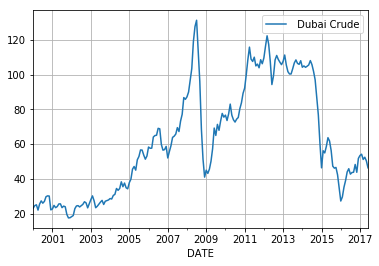

In [17]:
df_du.columns = [' Dubai Crude']
df_du.plot()

# 두 가지 이상의 유가 보기

DataReader 함수의 항목을 리스트로 전달하면, 한번에 여러 항목의 데이터를 가져올 수 있다

In [18]:
# POILDUBUSDM: 두바이유
# POILWTIUSDM: 서부 텍사스 중질유

df_oil = pdr.DataReader(['POILDUBUSDM', 'POILWTIUSDM'], 'fred', start='2000-01-01')

print('row count:', len(df_oil))
df_oil.tail(10)

row count: 210


POILDUBUSDM  POILWTIUSDM
DATE                                
2016-09-01    43.817273    45.167273
2016-10-01    48.263333    49.885238
2016-11-01    43.775000    45.623182
2016-12-01    51.762727    52.013636
2017-01-01    53.434545    52.559545
2017-02-01    54.171000    53.401500
2017-03-01    51.164348    49.584783
2017-04-01    52.447500    51.168000
2017-05-01    50.304348    48.559565
2017-06-01    46.336818    45.167727

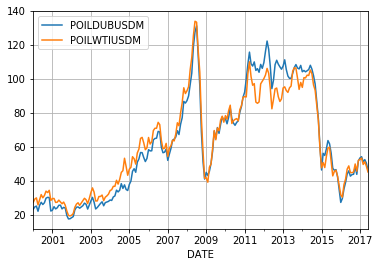

In [19]:
df_oil.plot()

# 두 가격의 차이
두 가격을 함께 놓고 보니, 두바이유와 서부 텍사스 중질유의 가격이 거의 같으나 약간 차이가 있다. 

차이를 구해서 상세하게 살펴보자

In [20]:
df_oil['diff'] = df_oil['POILDUBUSDM'] -  df_oil['POILWTIUSDM']
df_oil.tail(10)

POILDUBUSDM  POILWTIUSDM      diff
DATE                                          
2016-09-01    43.817273    45.167273 -1.350000
2016-10-01    48.263333    49.885238 -1.621905
2016-11-01    43.775000    45.623182 -1.848182
2016-12-01    51.762727    52.013636 -0.250909
2017-01-01    53.434545    52.559545  0.875000
2017-02-01    54.171000    53.401500  0.769500
2017-03-01    51.164348    49.584783  1.579565
2017-04-01    52.447500    51.168000  1.279500
2017-05-01    50.304348    48.559565  1.744783
2017-06-01    46.336818    45.167727  1.169091

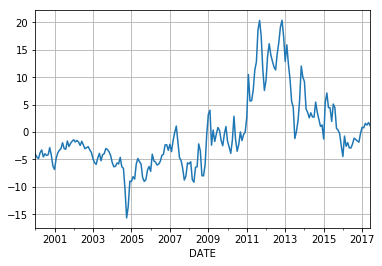

In [21]:
df_oil['diff'].plot()

가격의 차이를 좀 더 분명하게 표현해 보자. 0을 기준으로 낮으면 파란색, 높으면 빨간색으로 표시한다.

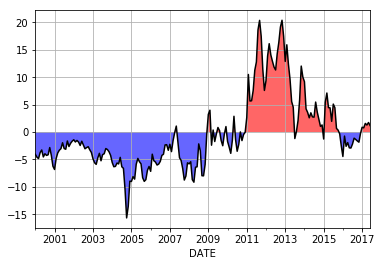

In [22]:
ax = df_oil['diff'].plot(color='k')

x = df_oil.index
y = df_oil['diff']

ax.fill_between(x, 0, y, where=y > 0, facecolor='r', alpha=0.6, interpolate=True)
ax.fill_between(x, 0, y, where=y <= 0, facecolor='b', alpha=0.6, interpolate=True)

### 2017 http://fb.com/financedata